**Importing Data and checking it out**

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

In [39]:
df = pd.read_csv('datafortask1.csv')

In [40]:
df.head(10)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [41]:
df.tail(10)

,Hours,Scores
15,8.9,95
16,2.5,30
17,1.9,24
18,6.1,67
19,7.4,69
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [42]:
df['Hours'].describe()

count    25.000000
mean      5.012000
std       2.525094
min       1.100000
25%       2.700000
50%       4.800000
75%       7.400000
max       9.200000
Name: Hours, dtype: float64

In [43]:
df['Scores'].describe()

count    25.000000
mean     51.480000
std      25.286887
min      17.000000
25%      30.000000
50%      47.000000
75%      75.000000
max      95.000000
Name: Scores, dtype: float64

**Checking for negative values, null values and outliers**

In [44]:
for i in df['Hours']:
    if i<0:
        print("Negative value spotted")

In [45]:
for i in df['Scores']:
    if i<0:
        print("Negative value spotted")

As we can notice, no negative values have been identified in each column

In [46]:
Q1 = np.quantile(df['Hours'],0.25)
Q3 = np.quantile(df['Hours'],0.75)
IQR = Q3-Q1
min_whisker = Q1 - (IQR*1.5)
max_whisker = Q3 + (IQR*1.5)
outliers = df[(df['Hours']<min_whisker) | (df['Hours']>max_whisker)]['Hours']
outliers.shape

(0,)

In [47]:
Q1 = np.quantile(df['Scores'],0.25)
Q3 = np.quantile(df['Scores'],0.75)
IQR = Q3-Q1
min_whisker = Q1 - (IQR*1.5)
max_whisker = Q3 + (IQR*1.5)
outliers = df[(df['Scores']<min_whisker) | (df['Scores']>max_whisker)]['Scores']
outliers.shape

(0,)

Likewise, there are no outliers as well for each column. 

In [55]:
df['Hours'].isnull().sum()

0

In [56]:
df['Scores'].isnull().sum()

0

No Null values are present in the data set

**Scatterplot**

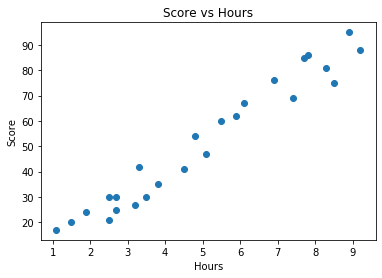

In [48]:
plt.scatter(df['Hours'], df['Scores'])
plt.title('Score vs Hours')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

From the Scatterplot above, we can observe that the relationship between hours studied and Score is linear and positive. As Number of Hours studied increases, the Score also increases.

**Linear Regression using OLS function**

In [49]:
y = df['Scores']
x = df['Hours']
x = sm.add_constant(x)
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Wed, 03 Feb 2021   Prob (F-statistic):           9.13e-17
Time:                        16:08:30   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.3

The Adjusted R-squared value is 0.951, which is essentially 95.1%. This means 95.1% of the variation in scores can be explained by the independent variable Hours studied. Another thing to notice is P>|t| value for Hours is 0, meaning there is significant association between Scores and Hours. 

From the OLS model, it's clear that the fitted regression equation is Scores = 2.4837 + 9.7758*Hours. The Y-intercept 2.4837 tells us the average score expected if a student studies for zero hours. As the hours have an additional increase, the average increase in scores is 9.7758. 

**Checking if residuals are normally distributed and there is constant variance**

In [50]:
residuals = model.resid
residuals.head(10)

0    -5.923182
1    -5.340271
2    -6.766244
3   -10.578002
4    -6.698985
5     2.852622
6    -4.421065
7     3.749408
8    -2.622842
9    -3.878343
dtype: float64

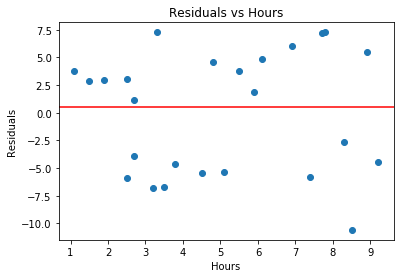

In [51]:
plt.scatter(df['Hours'], residuals)
plt.title('Residuals vs Hours')
plt.xlabel('Hours')
plt.ylabel('Residuals')
plt.axhline(y = 0.5, color = 'r', linestyle = '-') 
plt.show()

As it can be noticed, there is constant variance as the scatter plot shows the points are randomly scattered around the center.

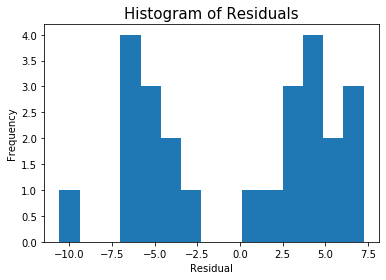

In [52]:
plt.hist(residuals, bins = 15);
plt.xlabel('Residual');
plt.ylabel('Frequency');
plt.title('Histogram of Residuals', fontsize=15);
plt.show();

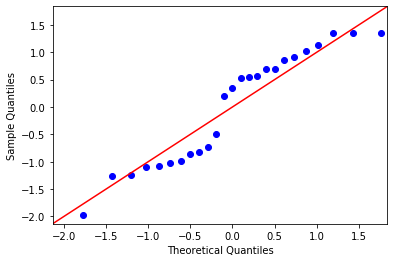

In [53]:
fig = sm.qqplot(residuals, fit=True, line="45")
plt.show() 

Both the histogram and Q-Q plots show that the residuals follow a normal distribution. In the histogram, it's clear that there is no clear right or left skew. Rather, it appears more symmetrical. The Q-Q plot shows that the plots are not too far from the linear line, therefore no serious concerns are raised.  

Question: What will be predicted score if a student studies for 9.25 hrs/ day?

In [57]:
#Answer
Hours = 9.25
Scores = 2.4837 + (9.7758*Hours)
print(Scores)

92.90985


Answer: The student will receive approximately 93 marks on the exam.